In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


In [2]:
def plt_linear(X_train, Y_train, prediction_tf, prediction_np):
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    ax[0].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[0].plot(X_train, prediction_tf,  c=dlc['dlblue'], label="model output")
    ax[0].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color=dlc['dlmagenta'])
    ax[0].legend(fontsize='xx-large')
    ax[0].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[0].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[0].set_title("Tensorflow prediction",fontsize='xx-large')

    ax[1].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[1].plot(X_train, prediction_np,  c=dlc['dlblue'], label="model output")
    ax[1].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color=dlc['dlmagenta'])
    ax[1].legend(fontsize='xx-large')
    ax[1].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[1].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[1].set_title("Numpy prediction",fontsize='xx-large')
    plt.show()

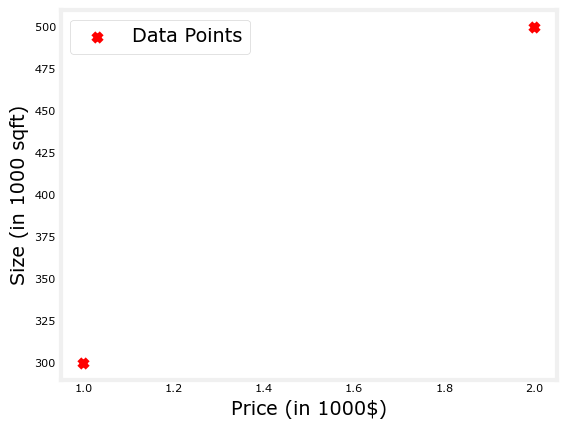

In [3]:
X_train = np.array([[1.0],[2.0]],dtype=np.float32)
y_train = np.array([[300],[500]],dtype= np.float32)

fig, ax = plt.subplots(1,1) 
ax.scatter(X_train,y_train, marker = 'x',c ='r',label = 'Data Points')
ax.set_xlabel('Price (in 1000$)',fontsize= 'xx-large')
ax.set_ylabel('Size (in 1000 sqft)',fontsize= 'xx-large')
ax.legend(fontsize= 'xx-large')
plt.show()

In [4]:
linear_layer = tf.keras.layers.Dense(1,activation='linear')
print(linear_layer.get_weights())

[]


In [5]:
model1 = linear_layer(X_train[0].reshape(-1,1))
print(model1)
print(linear_layer.get_weights())

tf.Tensor([[0.83]], shape=(1, 1), dtype=float32)
[array([[0.83]], dtype=float32), array([0.], dtype=float32)]


In [6]:
set_w = np.array([[200]])
set_b = np.array([100]) 
linear_layer.set_weights([set_w,set_b])
model2 = linear_layer(X_train[0].reshape(-1,1))
print(model2)
np_model = np.dot(set_w,X_train[0]) + set_b
print(np_model)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[300.]


In [7]:
pred_tf = linear_layer(X_train)
pred_np = np.dot(X_train,set_w) +set_b

dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0', dldarkblue =  '#0D5BDC')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'; dldarkblue =  '#0D5BDC'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]

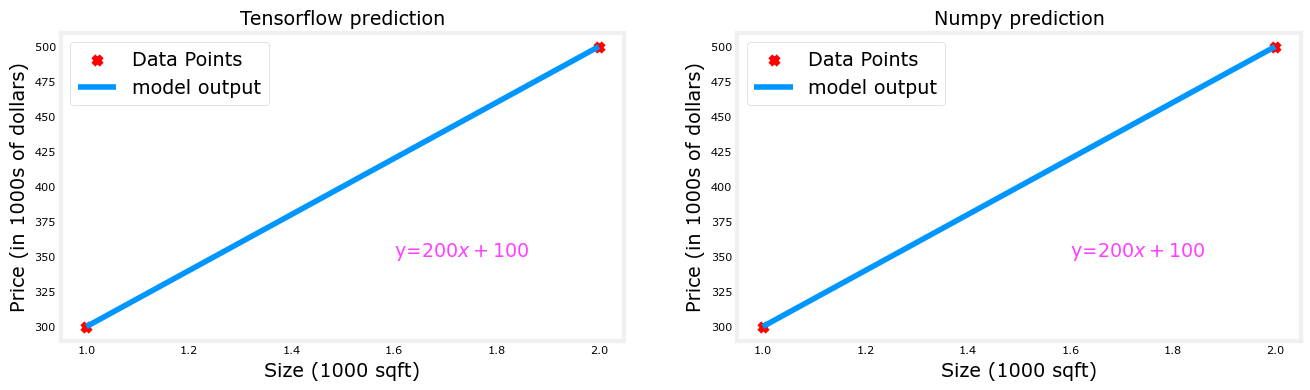

In [8]:
plt_linear(X_train,y_train,pred_tf,pred_np)